# SALES PREDICTION USING PYTHON

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Dataset Reading

In [86]:
df = pd.read_csv("C:\PGA32\MeriSkill\Oasis Infobyte\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### Dropping Columns

In [87]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [89]:
df.shape

(200, 4)

### Missing Value Treatment
No Missing Value

In [90]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Duplicate Checking

In [91]:
df.duplicated().sum()

0

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# Boxplot Chart

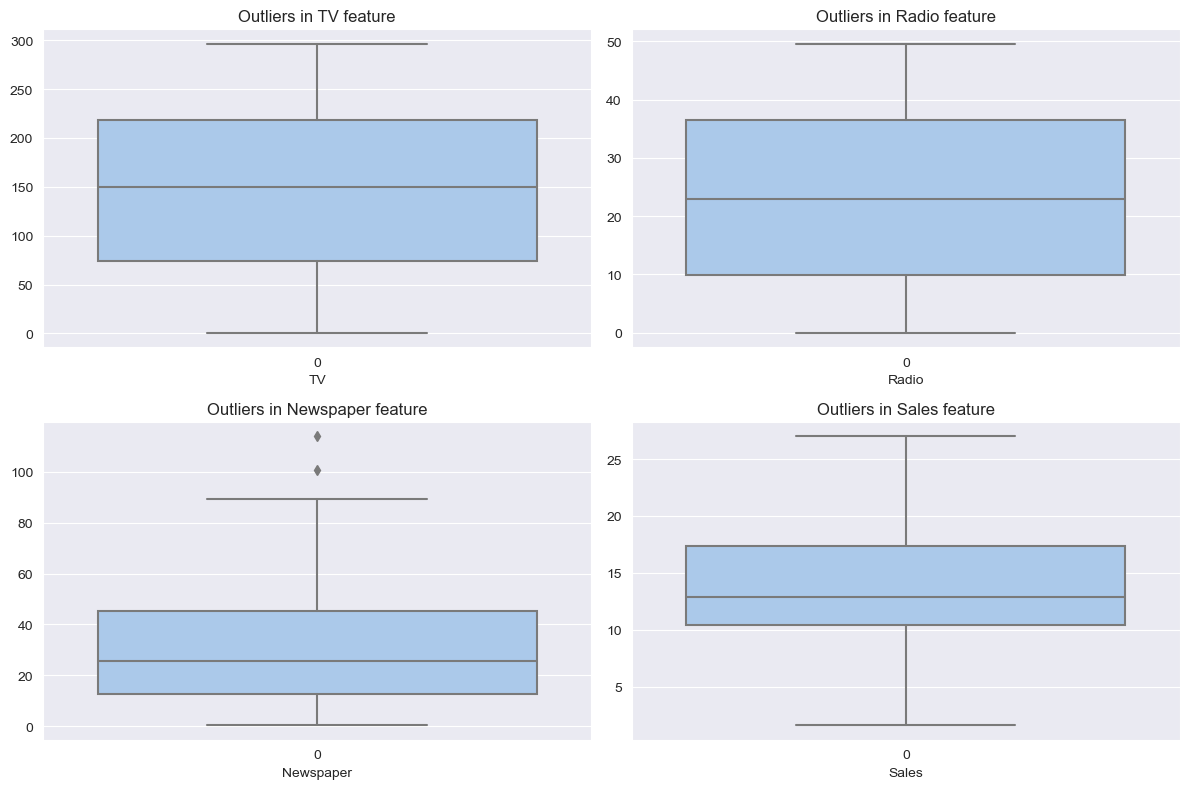

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name], palette="pastel", color='skyblue')  # You can change 'skyblue' to the color you prefer
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

# Heatmap Chart 
Numerical Variables

In [94]:
df.dtypes[df.dtypes!="object"]

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

### Correlation Matrix

In [95]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


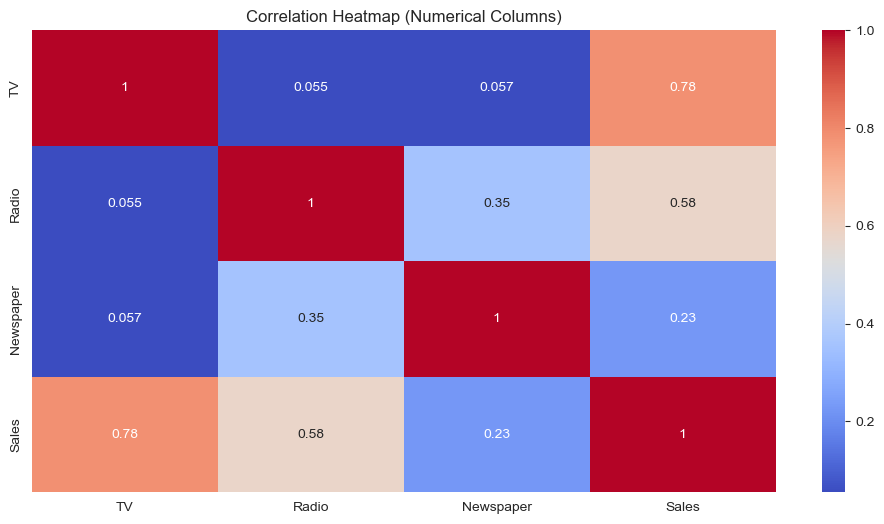

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()

### "TV" has the highest correlation with "Sales" (0.782224). 
### "TV" is the variable that is most strongly correlated with "Sales" in your dataset.

#  Distplot (Distribution Plot)

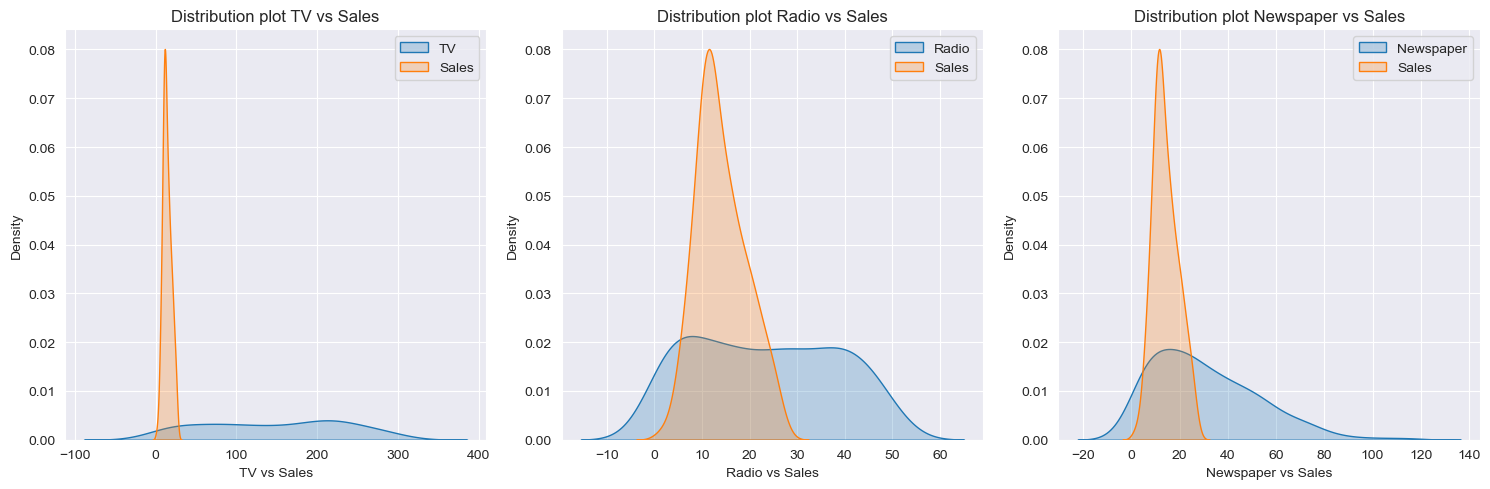

In [97]:
plt.figure(figsize=(15, 5))

columns = ["TV", "Radio", "Newspaper"]

for i, col_name in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df[col_name], label=col_name, shade=True)
    sns.kdeplot(df["Sales"], label="Sales", shade=True)
    plt.xlabel(f"{col_name} vs Sales")
    plt.title(f"Distribution plot {col_name} vs Sales")
    plt.legend()

plt.tight_layout()
plt.show()

In [98]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#  Pairplot Chart

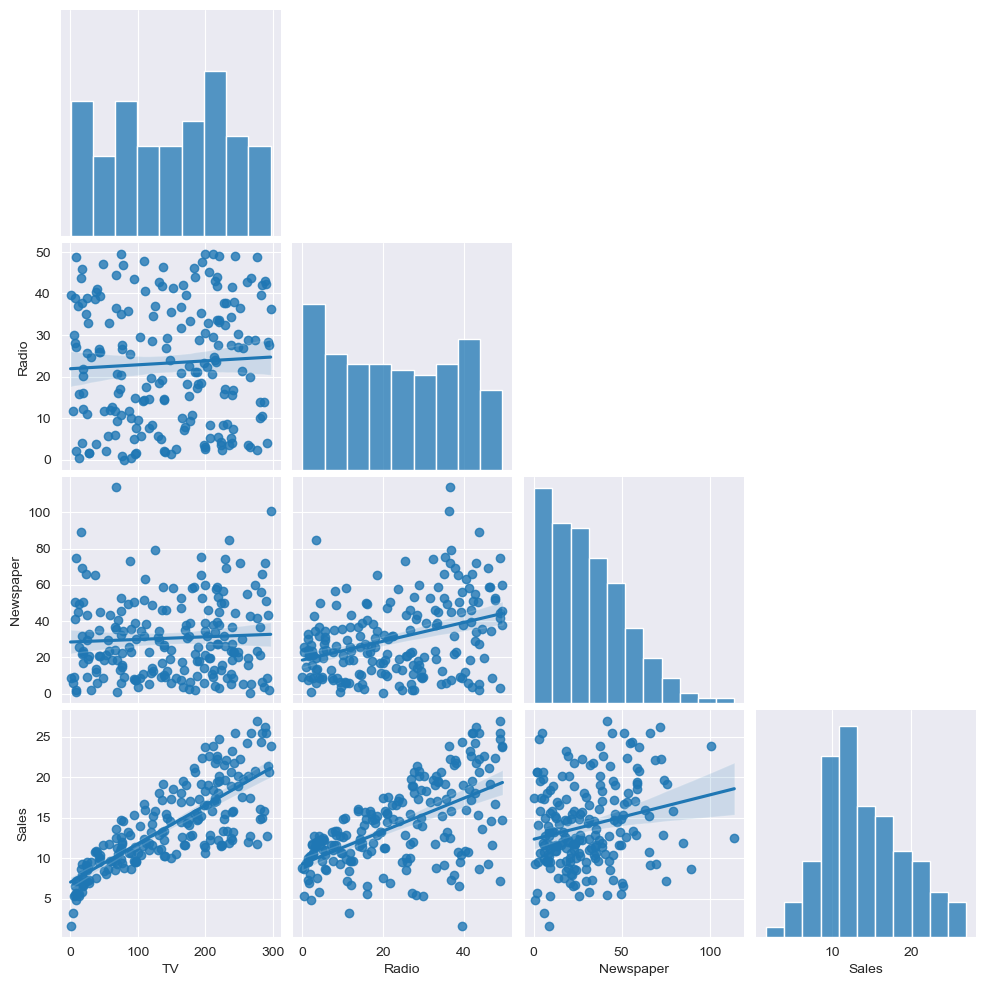

In [99]:
sns.pairplot(df, kind="reg",corner=True, );

# Scatterplot Chart

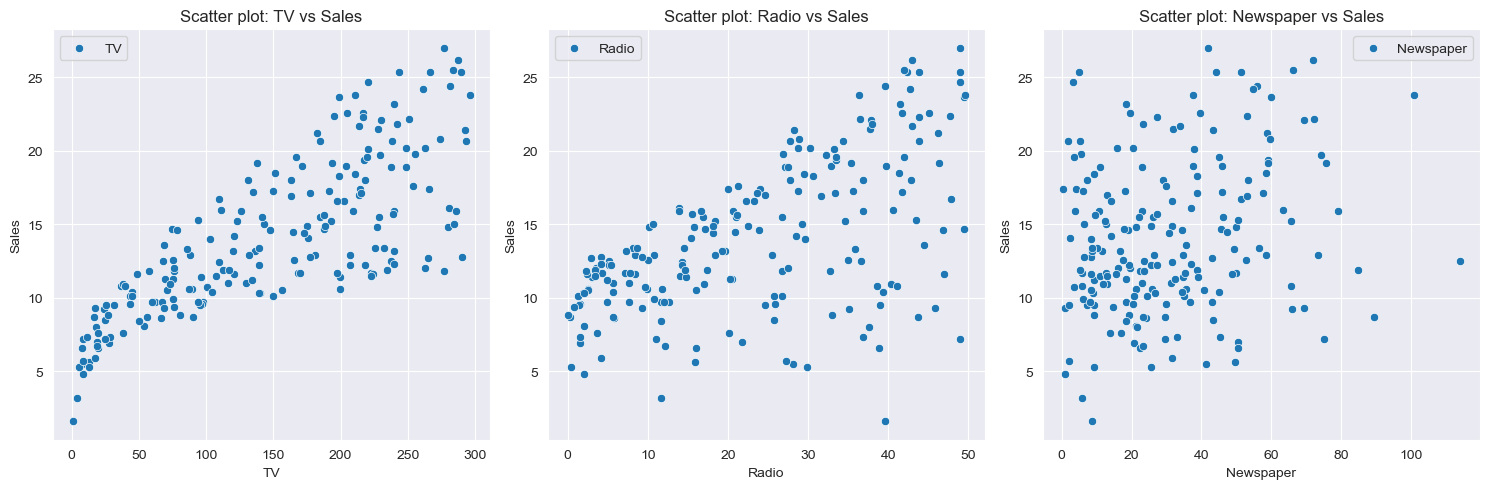

In [100]:
plt.figure(figsize=(15, 5))

columns = ["TV", "Radio", "Newspaper"]

for i, col_name in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[col_name], y=df["Sales"], label=col_name, palette="pastel")
    plt.xlabel(f"{col_name}")
    plt.ylabel("Sales")
    plt.title(f"Scatter plot: {col_name} vs Sales")
    plt.legend()

plt.tight_layout()
plt.show()

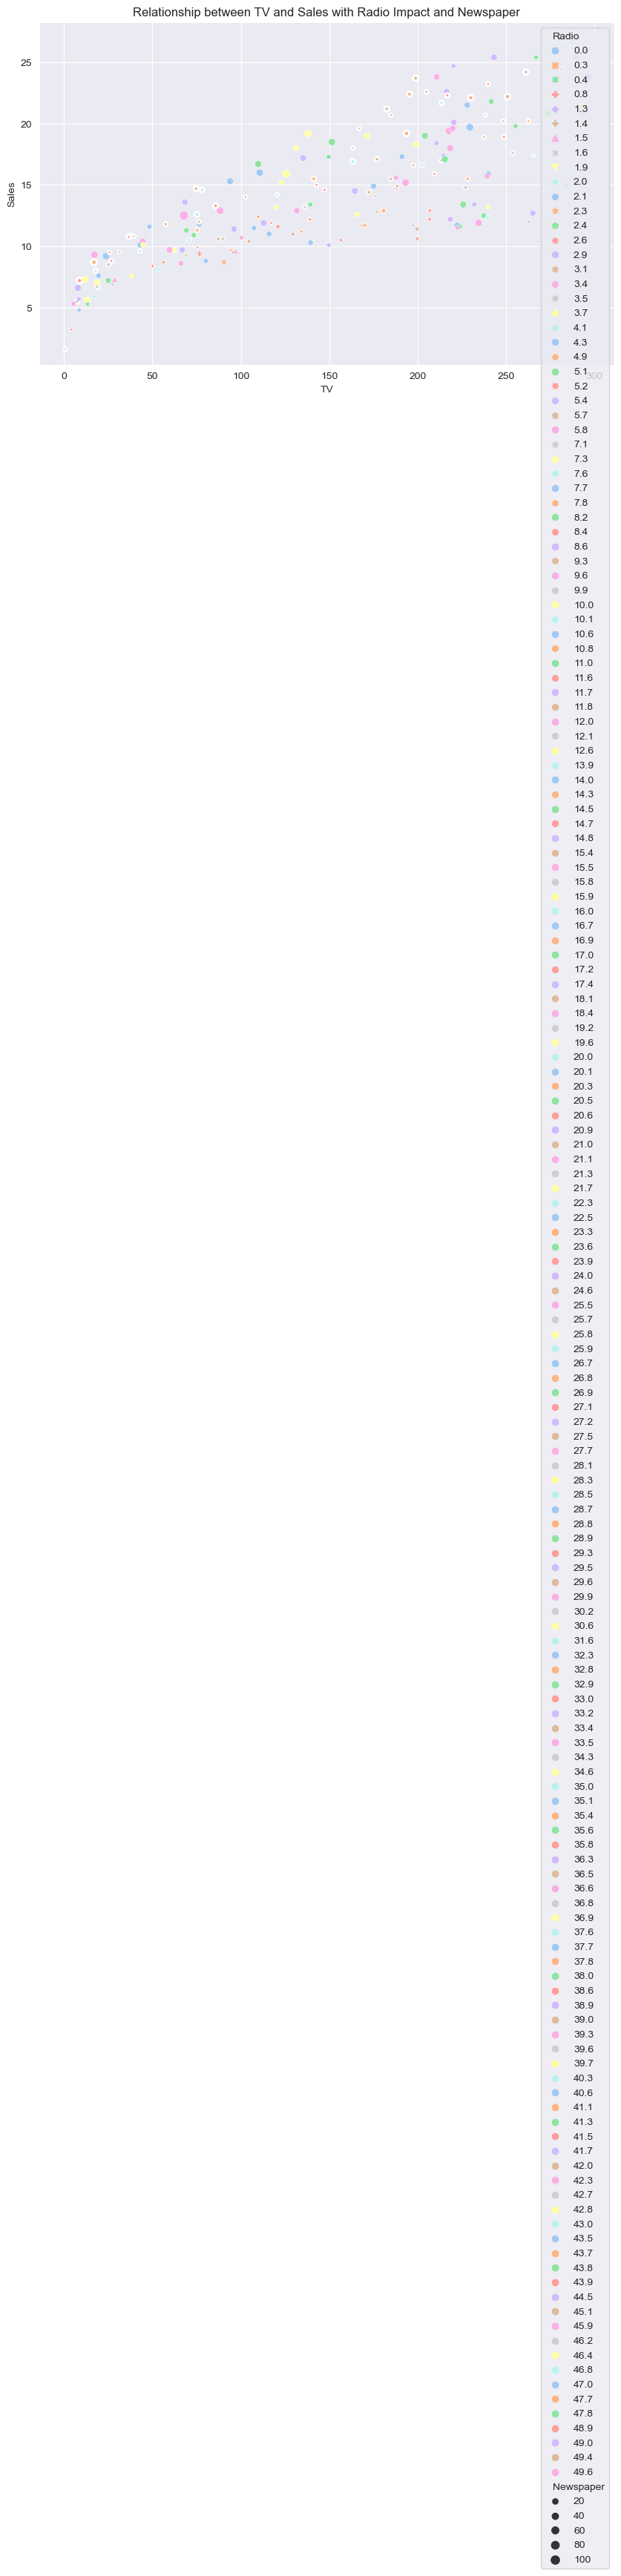

In [101]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x="TV", y="Sales",
    hue="Radio",  # Color based on the "Radio" feature
    style="Radio",  # Style based on the "Radio" feature
    size="Newspaper", palette="pastel", legend="brief",)  # Show legend


plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")
plt.show()

# Histplot (Histogram Plot) Chart

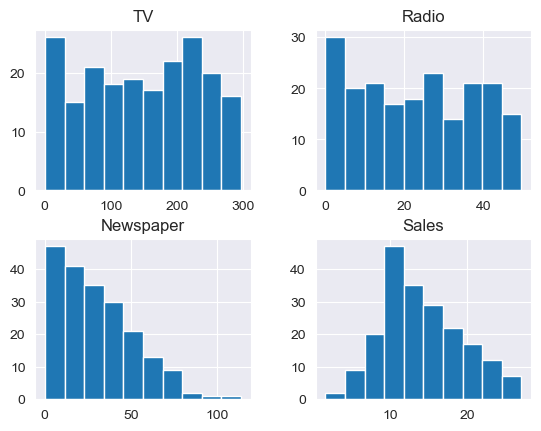

In [102]:
df.hist()
plt.show()

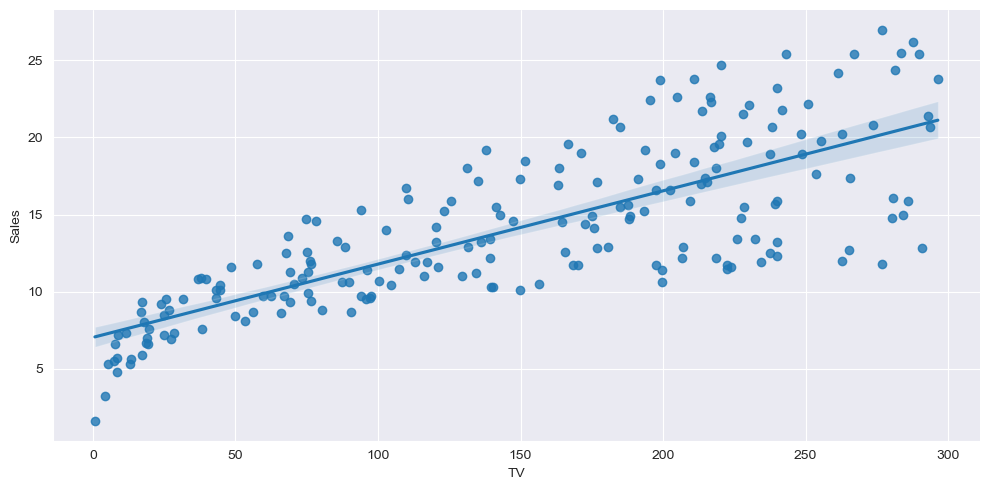

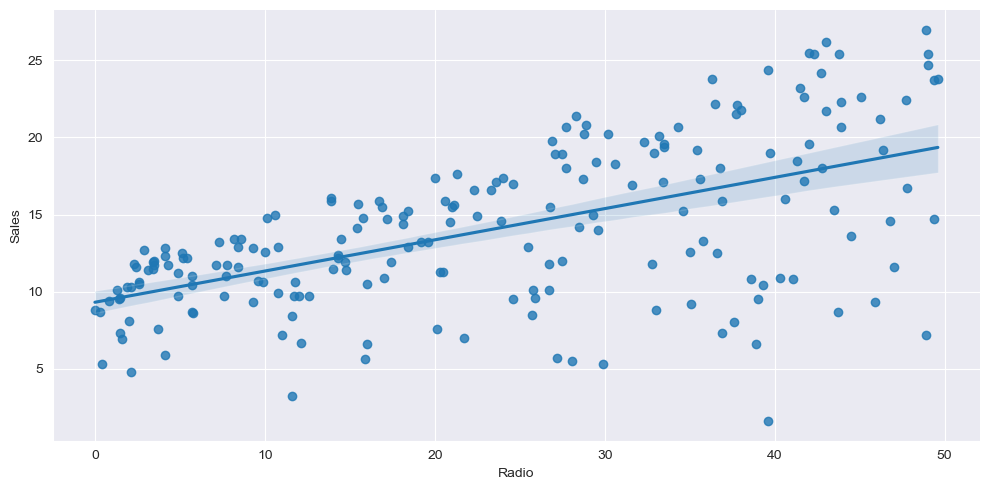

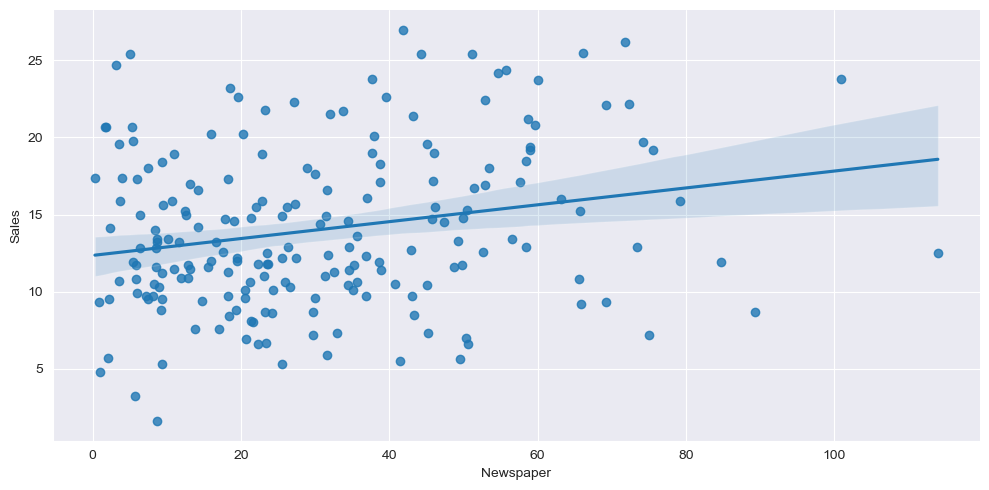

In [103]:
sns.lmplot(x='TV', y='Sales', data=df, height=5, aspect=2)
sns.lmplot(x='Radio', y='Sales', data=df, height=5, aspect=2)
sns.lmplot(x='Newspaper',y= 'Sales', data=df, height=5, aspect=2)
plt.show()

### Feature Variable (message) and Target Variable (category) data

In [104]:
# Separate the feature (message) and target (category) data
X = df.drop(columns="Sales", axis=1)
y = df["Sales"]

# Label Encoding

In [105]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

lebel = LabelEncoder()
y= lebel.fit_transform(y)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# StandardScaler

In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [109]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model =lm.fit(X_train,y_train)

In [110]:
import statsmodels.api as sm 
X = sm.add_constant(X)  

In [111]:
model = sm.OLS(y, X).fit() 

In [112]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     696.8
Date:                Sat, 18 Nov 2023   Prob (F-statistic):          2.98e-104
Time:                        10:50:30   Log-Likelihood:                -733.66
No. Observations:                 200   AIC:                             1475.
Df Residuals:                     196   BIC:                             1489.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7362      1.772     -6.622      0.0

In [114]:
lm.coef_

array([ 0.2829923 ,  1.17603196, -0.02126816])

In [115]:
lm.intercept_

-10.644905047106548

### Evaluation of Model

In [116]:
train_predict=lm.predict(X_train)

In [117]:
test_predict=lm.predict(X_test)

In [118]:
print("MSE of Train", np.mean((train_predict - y_train)**2))
print("RMSE of Train", np.sqrt(np.mean((train_predict-y_train)**2)))

print("MAE", np.mean(np.abs(train_predict- y_train)))
print("MAPE", np.mean(np.abs((train_predict-y_train)/y_train)))

MSE of Train 85.94980761179643
RMSE of Train 9.270911908318212
MAE 7.044324211282827
MAPE inf


In [119]:
print("MSE of Test", np.mean((test_predict - y_test)**2))
print("RMSE of Test", np.sqrt(np.mean((test_predict - y_test)**2)))

print("MAE", np.mean(np.abs(test_predict- y_test)))
print("MAPE", np.mean(np.abs((test_predict-y_test)/y_test)))

MSE of Test 108.88563941729076
RMSE of Test 10.434828192993441
MAE 8.139364092991366
MAPE 0.6065435717616542


In [120]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2_score(y_test, y_pred)*100:.2f}')

R2 Score: 91.30


# Lasso Regression Model

In [121]:
from sklearn.linear_model import Lasso

In [122]:
# Create and train the Lasso Regression model
alpha = 1.0  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

coefficients = lasso_model.coef_

# Creating a DataFrame with coefficients
coefficients = pd.DataFrame({'Coefficient': coefficients})

# Coefficients of the model
print('Lasso Regression Coefficients:')
print(coefficients)

Mean Squared Error: 116.77756122682163
Lasso Regression Coefficients:
   Coefficient
0    22.867020
1    16.240664
2     0.000000


#  Lineplot Chart Linear Regression

In [123]:
models = [
    ("Linear Regression", LinearRegression()),
    ]

Linear Regression
Mean Squared Error: 108.89
R2 Score: 91.37
Average Cross-Validation R2 Score: 91.37


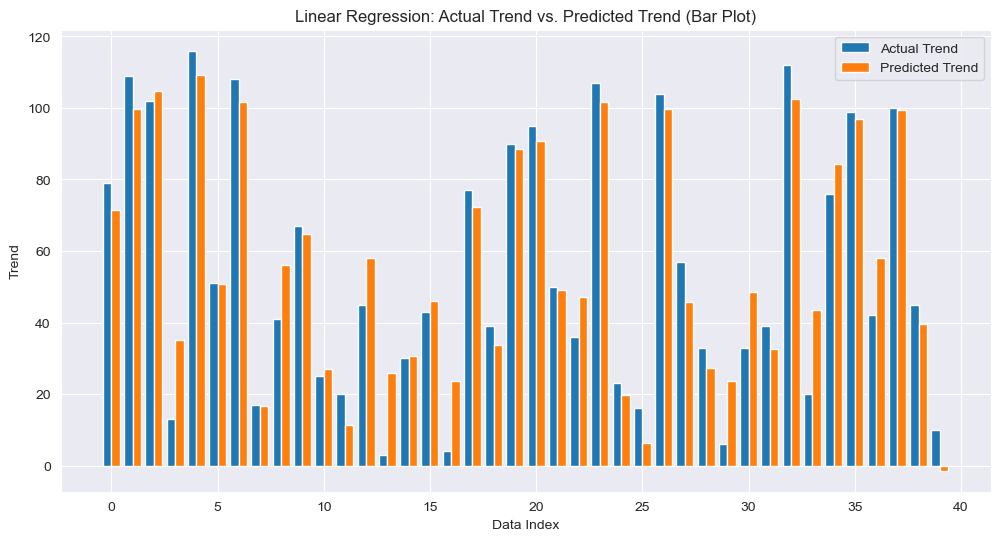

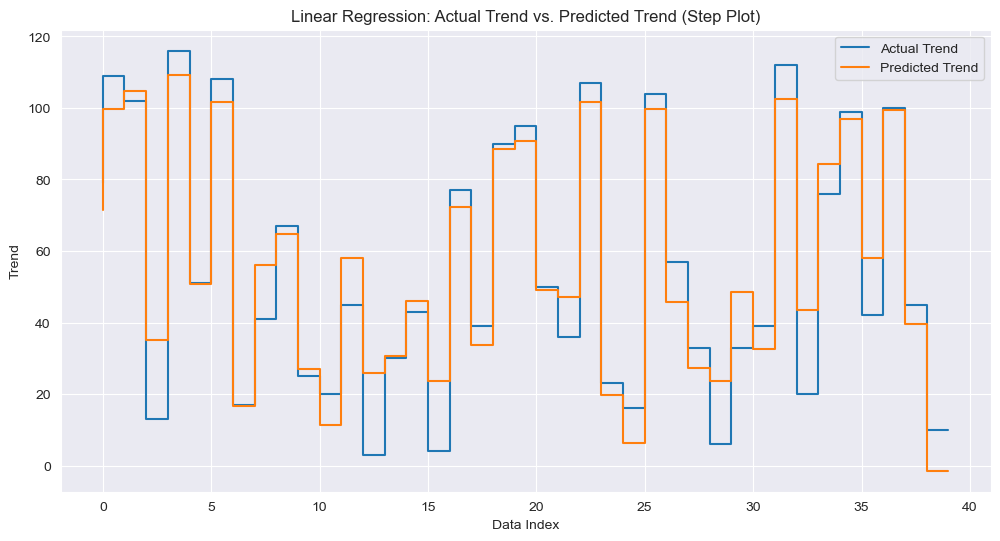

In [124]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    R2_scores = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)*1:.2f}')
    print(f'R2 Score: {r2_score(y_test, y_pred)*100:.2f}')
    print(f'Average Cross-Validation R2 Score: {np.mean(R2_scores)*100:.2f}')
    
    
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(len(y_test))-0.2, y_test, width=0.4, label='Actual Trend')
    plt.bar(np.arange(len(y_test))+0.2, y_pred, width=0.4, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend (Bar Plot)')
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize=(12, 6))
    plt.step(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.step(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend (Step Plot)')
    plt.legend()

#  Lineplot Chart Lasso Regression

In [125]:
model_s = [
    ("Lasso Regression", Lasso()),
    ]

Model: Lasso Regression
Mean Squared Error: 116.78
R2 Score: 90.75
Average Cross-Validation R2 Score: 88.23



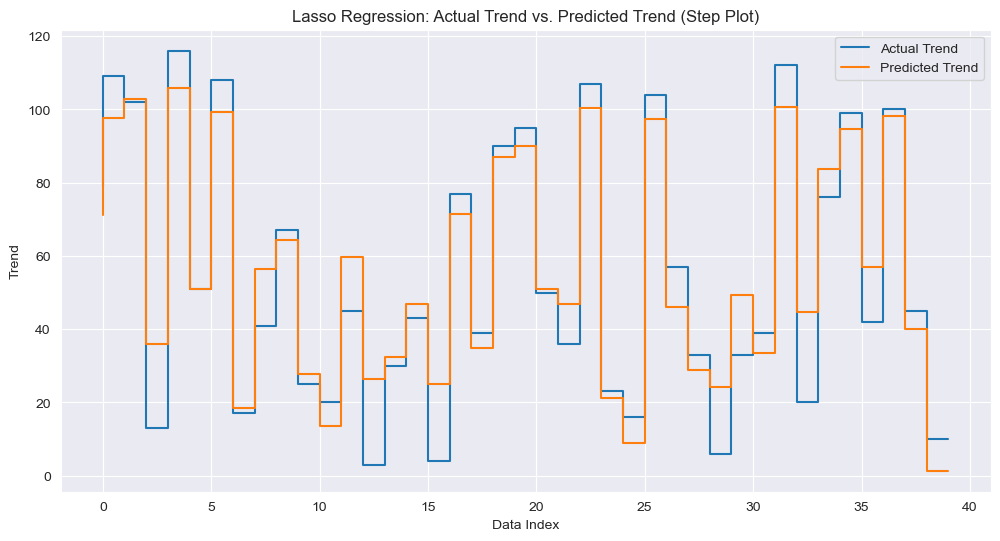

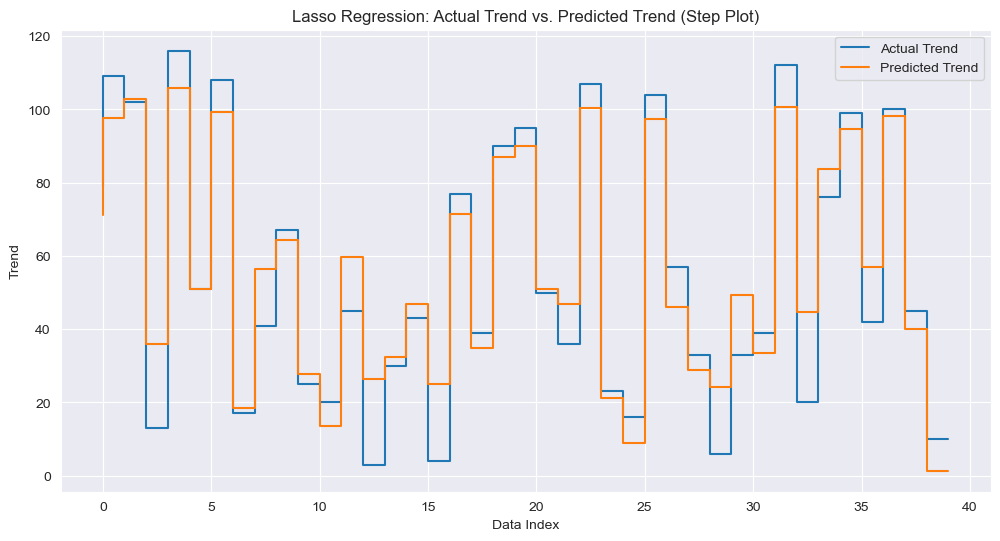

In [126]:
for name, model in model_s:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("Model: {}".format(name))
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R2 Score: {r2*100:.2f}')
    print(f'Average Cross-Validation R2 Score: {np.mean(cv_scores)*100:.2f}')
    print()
    plt.figure(figsize=(12, 6))
    plt.step(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.step(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend (Step Plot)')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.step(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.step(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend (Step Plot)')
    plt.legend()

# Ridge Regression Model

In [127]:
from sklearn.linear_model import Ridge

In [128]:
# Create and train the Ridge Regression model
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get coefficients of the model
coefficients = ridge_model.coef_

# Creating a DataFrame with coefficients
coefficients = pd.DataFrame({'Coefficient': coefficients})

# Coefficients of the Ridge Regression model
print('Ridge Regression Coefficients:')
print(coefficients)

Mean Squared Error: 109.82703345175598
Ridge Regression Coefficients:
   Coefficient
0    23.672643
1    17.236791
2    -0.379459


# Lineplot Chart Ridge Regression

In [129]:
model_ss = [
    ("Rigde Regression", Ridge()),
    ]

Model: Rigde Regression
Mean Squared Error: 109.83
R2 Score: 91.30
Average Cross-Validation R2 Score: 88.28



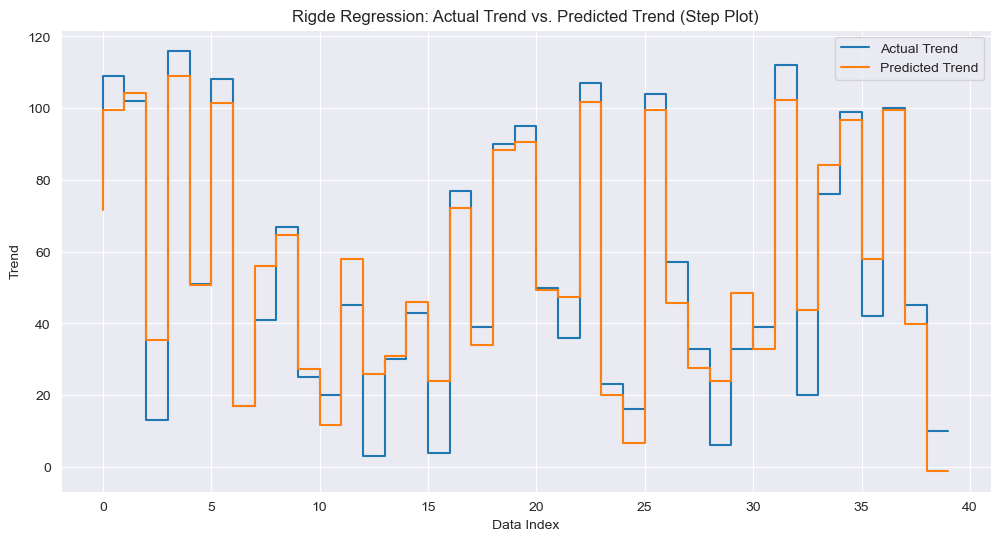

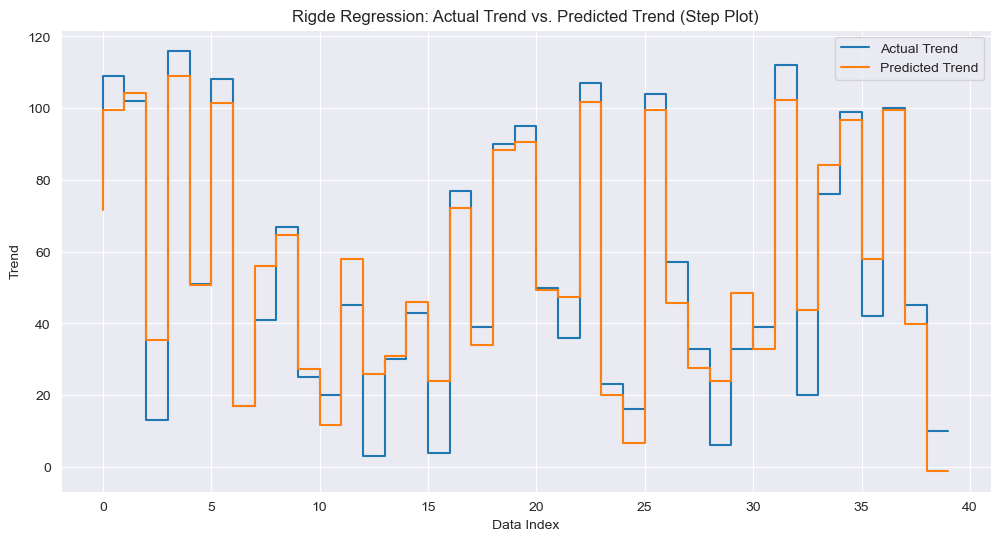

In [130]:
for name, model in model_ss:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("Model: {}".format(name))
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R2 Score: {r2*100:.2f}')
    print(f'Average Cross-Validation R2 Score: {np.mean(cv_scores)*100:.2f}')
    print()
    plt.figure(figsize=(12, 6))
    plt.step(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.step(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend (Step Plot)')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.step(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.step(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend (Step Plot)')
    plt.legend()

# Model Testing

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
# Input values for the new data
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value:"))

# Create a DataFrame for the new data
new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]})


# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions
new_pred = lr.predict(new_data_scaled)

# Display the predicted sales
print("-------------------------------------")
print("Predicted Sales: {}".format(abs(new_pred)))

Enter the TV value: 82
Enter the Radio value: 36
Enter the Newspaper value:20
-------------------------------------
Predicted Sales: [9.81741445]


<div class = "alert alert-success">
<h3>Tested on Following Details</h3> 
<ui>
<li>Enter the TV value:  82</li>
<li>Enter the Radio value:  36</li>
<li>Enter the Newspaper value: 20</li>
</ui>
</div>

# THANK YOU